# LAB1. REGRESSION MODELS 

# LAB1. REGRESSION ANALYSIS

In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Load data

Рівень забруднення атмосферного повітря за адресою:
площа імені Івана Франка, 1
у місті Ніжин

- Device_id - ID посту, де відбувається вимірювання. Для Києва таких постів 213 (архів Ecobot_16_11_2020.rar). Відповідно кожен пост має свій унікальний ID, який потрібно використовувати (він зазначений у назві відповідного .scv-фалу).

- Phenomenon – тип забруднювача повітря (оксид вуглецю, діоксид вуглецю, PM2.5, PM10, тиск, температура тощо)

- Value – значення відповідного забрудника 

- Logged_at – час, коли відбувся вимір


In [2]:
data = pd.read_csv('saveecobot_22092.csv')
data

,device_id,phenomenon,value,logged_at,value_text
0,22092,pm10,35.20,2022-10-28 14:29:38,NaN
1,22092,pm25,3.90,2022-10-28 14:29:38,NaN
2,22092,heca_temperature,37.53,2022-10-28 14:29:38,NaN
3,22092,heca_humidity,50.97,2022-10-28 14:29:38,NaN
4,22092,min_micro,1318.00,2022-10-28 14:29:38,NaN
...,...,...,...,...,...
879455,22092,pressure_pa,998263.20,2024-09-28 21:30:01,NaN
879456,22092,humidity,47.85,2024-09-28 21:30:01,NaN
879457,22092,min_micro,1298.00,2024-09-28 21:30:01,NaN
879458,22092,max_micro,22561.00,2024-09-28 21:30:01,NaN


## Data Preprocessing

In [3]:
data = data.drop(['value_text'], axis=1)
data

,device_id,phenomenon,value,logged_at
0,22092,pm10,35.20,2022-10-28 14:29:38
1,22092,pm25,3.90,2022-10-28 14:29:38
2,22092,heca_temperature,37.53,2022-10-28 14:29:38
3,22092,heca_humidity,50.97,2022-10-28 14:29:38
4,22092,min_micro,1318.00,2022-10-28 14:29:38
...,...,...,...,...
879455,22092,pressure_pa,998263.20,2024-09-28 21:30:01
879456,22092,humidity,47.85,2024-09-28 21:30:01
879457,22092,min_micro,1298.00,2024-09-28 21:30:01
879458,22092,max_micro,22561.00,2024-09-28 21:30:01


In [4]:
data.isnull().values.any()

False

In [5]:
data = data.pivot_table(
    index=['device_id', 'logged_at'],
    columns='phenomenon',
    values='value', 
    aggfunc='first'
)

data.reset_index(inplace=True)

In [6]:
data

phenomenon,device_id,logged_at,heca_humidity,heca_temperature,humidity,max_micro,min_micro,pm10,pm25,pressure_pa,signal,temperature
0,22092,2022-10-28 14:29:38,50.97,37.53,NaN,595296.0,1318.0,35.2,3.9,NaN,-49.0,NaN
1,22092,2022-10-28 14:32:04,53.40,34.97,NaN,58259.0,1324.0,38.4,4.5,NaN,-53.0,NaN
2,22092,2022-10-28 14:34:48,55.26,32.80,NaN,58157.0,1310.0,30.6,4.2,NaN,-54.0,NaN
3,22092,2022-10-28 14:37:20,57.89,31.02,NaN,58415.0,1315.0,30.9,4.1,NaN,-55.0,NaN
4,22092,2022-10-28 14:39:58,60.06,29.83,NaN,58604.0,1324.0,32.5,4.3,NaN,-52.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
88516,22092,2024-09-28 21:20:18,51.14,22.85,47.70,22810.0,1297.0,17.6,2.4,998233.3,-64.0,21.03
88517,22092,2024-09-28 21:22:44,51.20,22.82,47.84,22614.0,1304.0,13.9,2.7,998240.8,-67.0,21.00
88518,22092,2024-09-28 21:25:10,51.23,22.79,47.79,22558.0,1307.0,10.0,2.2,998215.5,-67.0,20.97
88519,22092,2024-09-28 21:27:36,51.29,22.76,47.87,22565.0,1295.0,12.6,2.9,998171.6,-68.0,20.95


In [7]:
data.isnull().values.any() 

True

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().values.any() 

False

## Correlations

sth is weong


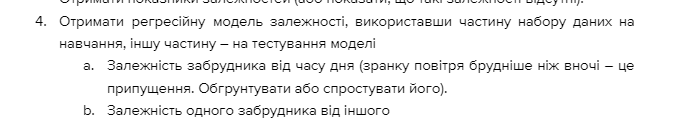

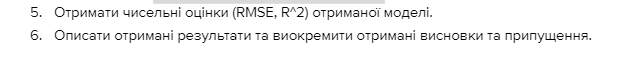

## Splitting the dataset into training and test set

Залежність PM25 від PM10:
RMSE: 3.495814075205514
R²: 0.8890255511287304


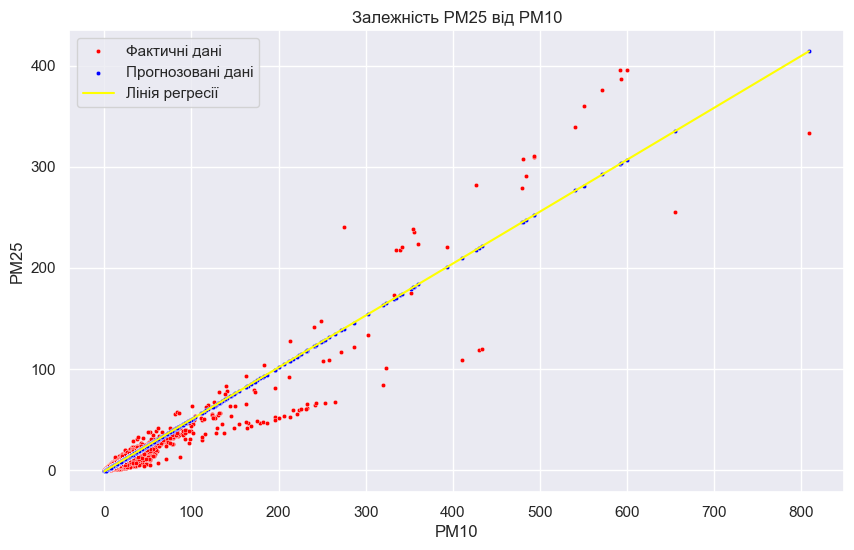

In [26]:

X = data[['pm10']]  # Ознака X
Y = data['pm25']    # Ціль Y


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
r2 = r2_score(y_test, y_pred)  

print("Залежність PM25 від PM10:")
print("RMSE:", rmse)
print("R²:", r2)


plt.figure(figsize=(10, 6))

sns.scatterplot(x=X_test.values.flatten(), y=y_test, color='red', s=10, label='Фактичні дані')

sns.scatterplot(x=X_test.values.flatten(), y=y_pred, color='blue', s=10, label='Прогнозовані дані')

sns.lineplot(x=X_test.values.flatten(), y=y_pred, color='yellow', label='Лінія регресії')

plt.title('Залежність PM25 від PM10')
plt.xlabel('PM10')
plt.ylabel('PM25')
plt.legend()
plt.show()

In [14]:
data.dtypes

phenomenon
device_id             int64
logged_at            object
heca_humidity       float64
heca_temperature    float64
humidity            float64
max_micro           float64
min_micro           float64
pm10                float64
pm25                float64
pressure_pa         float64
signal              float64
temperature         float64
dtype: object

In [15]:
data['logged_at'] = pd.to_datetime(data['logged_at'])

# Створення нових колонок для години, місяця та року
data['hour'] = data['logged_at'].dt.hour
data['month'] = data['logged_at'].dt.month
data['year'] = data['logged_at'].dt.year

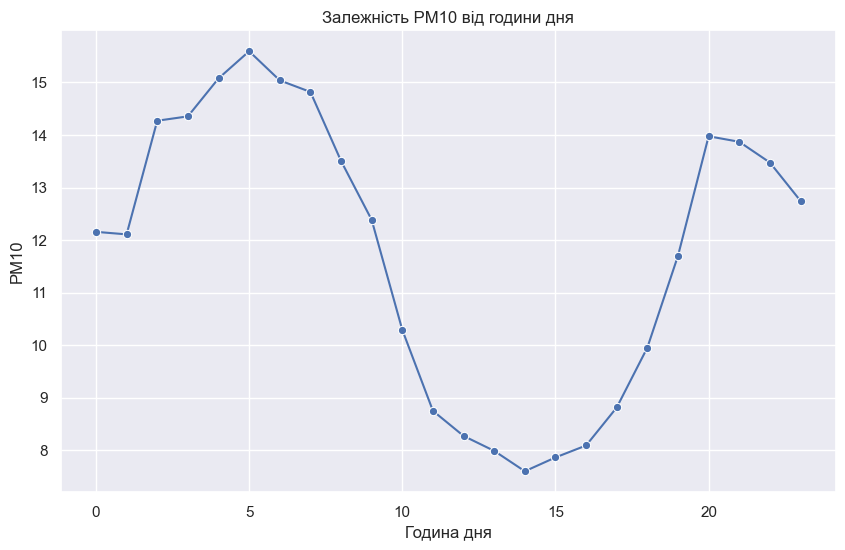

In [20]:
# графік залежності PM10 від години дня
plt.figure(figsize=(10, 6))
hourly_avg_pm10 = data.groupby('hour')['pm10'].mean().reset_index()  
sns.lineplot(x='hour', y='pm10', data=hourly_avg_pm10, marker='o')


plt.title('Залежність PM10 від години дня')
plt.xlabel('Година дня')
plt.ylabel('PM10')

plt.show()

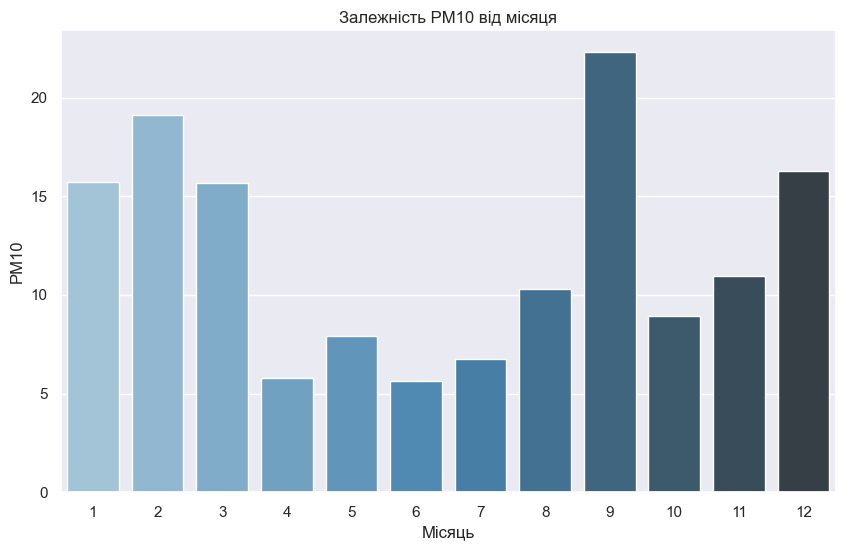

In [18]:
# графік залежності PM10 від місяця 
plt.figure(figsize=(10, 6))
monthly_avg_pm10 = data.groupby('month')['pm10'].mean().reset_index()  # Групування за місяцем
sns.barplot(x='month', y='pm10', data=monthly_avg_pm10, palette='Blues_d')

plt.title('Залежність PM10 від місяця')
plt.xlabel('Місяць')
plt.ylabel('PM10')

plt.show()